<a href="https://colab.research.google.com/github/queziamirandaDev/Python-para-DataScience/blob/main/11_corre%C3%A7%C3%A3o_exercicio_de_revis%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd

# bibliotecas graficas
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df_vendas1 = pd.read_excel('Vendas.xlsx', parse_dates=['Data'])
df_vendas1.head()

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,1,2023-01-01,Loja São Paulo 1,HD SSD Samsung 256 Gb,1,358R$,358.0
1,1,2023-01-01,Loja São Paulo 1,Kit Teclado e Mouse Sem Fio,2,180R$,360.0
2,1,2023-01-01,Loja São Paulo 1,HD SSD Kingston 500 Gb,1,368R$,368.0
3,2,2023-01-02,Loja São Paulo 1,Memória DDR 4 Seagate 4 Gb,3,250R$,750.0
4,2,2023-01-02,Loja São Paulo 1,Cartucho de Tinta HP BK123,1,70R$,70.0


In [6]:
df_vendas2 = pd.read_excel('Vendas - Dez.xlsx', parse_dates=['Data'])
df_vendas2.head()

,Código Venda,Data,ID Loja,Produto,Quantidade,Valor Unitário,Valor Final
0,65014,2023-12-01,Loja Porto Alegre,Kit Teclado e Mouse Sem Fio,5,114,570
1,65014,2023-12-01,Loja Porto Alegre,Mouse sem Fio Microsoft,1,269,269
2,65016,2023-12-01,Loja São Paulo 2,Mouse Pad Colorido,2,363,726
3,65016,2023-12-01,Loja São Paulo 2,Mouse sem Fio Microsoft,1,250,250
4,65017,2023-12-01,Loja Fortaleza,Teclado sem Fio Megaware,3,92,276


In [7]:
df_gerentes = pd.read_excel('Gerentes.xlsx')
df_gerentes.head()

,ID Loja,Gerente
0,Loja São Paulo 1,Paulo
1,Loja São Paulo 2,Joana
2,Loja São Paulo 3,Maria
3,Loja Campinas,Letícia
4,Loja Rio de Janeiro 1,Fábio


##Analise Exploratória

In [8]:
df_vendas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93910 entries, 0 to 93909
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Código Venda    93910 non-null  int64         
 1   Data            93910 non-null  datetime64[ns]
 2   ID Loja         93910 non-null  object        
 3   Produto         93910 non-null  object        
 4   Quantidade      93910 non-null  int64         
 5   Valor Unitário  93910 non-null  object        
 6   Valor Final     93766 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 5.0+ MB


In [9]:
df_vendas2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7089 entries, 0 to 7088
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Código Venda    7089 non-null   int64         
 1   Data            7089 non-null   datetime64[ns]
 2   ID Loja         7089 non-null   object        
 3   Produto         7089 non-null   object        
 4   Quantidade      7089 non-null   int64         
 5   Valor Unitário  7089 non-null   int64         
 6   Valor Final     7089 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 387.8+ KB


In [10]:
df_gerentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   ID Loja  14 non-null     object
 1   Gerente  14 non-null     object
dtypes: object(2)
memory usage: 356.0+ bytes


###Arrumando as colunas

In [11]:
nome_colunas = df_vendas1.columns
novas_colunas = []
for palavra  in nome_colunas:
    novas_colunas.append(palavra.lower().strip().replace(' ', '_'))
df_vendas1.columns = novas_colunas
df_vendas2.columns = novas_colunas

In [12]:
nome_colunas = df_gerentes.columns
novas_colunas = []
for palavra  in nome_colunas:
    novas_colunas.append(palavra.lower().strip().replace(' ', '_'))
df_gerentes.columns = novas_colunas

### tratamento de dados


In [13]:
df_vendas1['valor_unitário'] = df_vendas1['valor_unitário'].str.replace(r'R\$', '', regex=True)

In [14]:
df_vendas1['valor_unitário'].head()

,valor_unitário
0,358
1,180
2,368
3,250
4,70


In [15]:
df_vendas1['valor_unitário'] = df_vendas1['valor_unitário'].astype(float)

In [16]:
df_vendas1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93910 entries, 0 to 93909
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   código_venda    93910 non-null  int64         
 1   data            93910 non-null  datetime64[ns]
 2   id_loja         93910 non-null  object        
 3   produto         93910 non-null  object        
 4   quantidade      93910 non-null  int64         
 5   valor_unitário  93910 non-null  float64       
 6   valor_final     93766 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 5.0+ MB


### Missing Values / valores nulos

In [17]:
df_vendas1['valor_final'].fillna(df_vendas1['valor_unitário'] * df_vendas1['quantidade'], inplace=True)

/tmp/ipython-input-3278445512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_vendas1['valor_final'].fillna(df_vendas1['valor_unitário'] * df_vendas1['quantidade'], inplace=True)


In [18]:
df_vendas1.isna().sum()

,0
código_venda,0
data,0
id_loja,0
produto,0
quantidade,0
valor_unitário,0
valor_final,0


## Junção das bases

In [20]:
df_vendas = pd.concat([df_vendas1,df_vendas2],axis=0, join='inner', ignore_index=True)

In [21]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   código_venda    100999 non-null  int64         
 1   data            100999 non-null  datetime64[ns]
 2   id_loja         100999 non-null  object        
 3   produto         100999 non-null  object        
 4   quantidade      100999 non-null  int64         
 5   valor_unitário  100999 non-null  float64       
 6   valor_final     100999 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 5.4+ MB


In [22]:
df_completo = df_vendas.merge(df_gerentes, on='id_loja', how='inner')

In [23]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100999 entries, 0 to 100998
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   código_venda    100999 non-null  int64         
 1   data            100999 non-null  datetime64[ns]
 2   id_loja         100999 non-null  object        
 3   produto         100999 non-null  object        
 4   quantidade      100999 non-null  int64         
 5   valor_unitário  100999 non-null  float64       
 6   valor_final     100999 non-null  float64       
 7   gerente         100999 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 6.2+ MB


##Analise descritiva

1. Qual faturamento total do periodo analisado

In [24]:
faturamento = df_completo['valor_final'].sum()
print(f'Faturamento total: R${faturamento:,.2f}')

Faturamento total: R$45,881,030.00


2. Qual loja teve maior faturamento ?

In [25]:
df_loja = df_completo.groupby('id_loja')['valor_final'].sum().sort_values(ascending=False)
# print(f'{df_loja[:1]}')
for k, v in df_loja.head(1).items():
    print(f'{k}: R${v:,.2f}')

Loja São Paulo 3: R$7,194,934.00


3. Qual foi produto mais vendido em quantidade?


In [26]:
df_prod_qtd = df_completo.groupby('produto')['quantidade'].sum().sort_values(ascending=False)
for k, v in df_prod_qtd.head(1).items():
    print(f'{k}: {v} unidades vendidas')

Memória DDR 4 Seagate 4 Gb: 37241 unidades vendidas


4. Qual foi produto menos vendido em quantidade?

In [27]:
for k, v in df_prod_qtd.tail(1).items():
    print(f'{k}: {v} unidades vendidas')

HD SSD Seagate 1 Tb: 1604 unidades vendidas


5. Qual produto gerou maior receita (somatório valor final)?

In [28]:
df_prod_receita = df_completo.groupby('produto')['valor_final'].sum().sort_values(ascending=False)
for k, v in df_prod_receita.head(1).items():
    print(f'{k}: R${v:,.2f}')

Memória DDR 4 Seagate 4 Gb: R$9,310,250.00


6. Criar tabela com total de vendas em valor final por gerente ?

In [29]:
df_gerentes_receita = df_completo.groupby('gerente')['valor_final'].sum().sort_values(ascending=False)
display(df_gerentes_receita)

,valor_final
gerente,
Maria,7194934.0
Paulo,5583465.0
Luiza,5552513.0
Joana,5539493.0
Fábio,5377327.0
André,1893440.0
Nicole,1890561.0
Letícia,1886172.0
João,1882970.0


7. Identificar o gerente com maior volume de vendas em faturamento

In [30]:
df_gerentes_qtd = df_completo.groupby('gerente')['quantidade'].sum().sort_values(ascending=False)
display(df_gerentes_qtd)

,quantidade
gerente,
Maria,34343
Luiza,26673
Paulo,26531
Joana,26296
Fábio,25690
André,9091
João,8927
Nicole,8863
Letícia,8863


8. Qual mes com maior faturamento ?

In [31]:
df_completo['mes'] = df_completo['data'].dt.month
df_completo['mes']

,mes
0,1
1,1
2,1
3,1
4,1
...,...
100994,12
100995,12
100996,12
100997,12


In [32]:
df_faturamento_mes = df_completo.groupby('mes')['valor_final'].sum().sort_values(ascending=False)
df_faturamento_mes = df_faturamento_mes.rename({
    1:'Janeiro',
    2:'Fevereiro',
    3:'Março',
    4:'Abril',
    5:'Maio',
    6:'Junho',
    7:'Julho',
    8:'Agosto',
    9:'Setembro',
    10:'Outubro',
    11:'Novembro',
    12:'Dezembro'
})
display(df_faturamento_mes)

,valor_final
mes,
Outubro,4024237.0
Março,4021975.0
Julho,4001723.0
Maio,3973784.0
Agosto,3910298.0
Abril,3908595.0
Junho,3906247.0
Novembro,3900529.0
Setembro,3867037.0


9. qual foi o produto mais vendido por gerente ?

In [33]:
gerentes = df_completo.groupby(['gerente','produto'])['quantidade'].sum().reset_index()

In [34]:
idx = gerentes.groupby('gerente')['quantidade'].idxmax()
df_gerentes_prod = gerentes.loc[idx].sort_values(by='quantidade', ascending=False)
df_gerentes_prod.head(14)

,gerente,produto,quantidade
426,Maria,Memória DDR 4 Seagate 4 Gb,5830
204,Joana,Memória DDR 4 Seagate 4 Gb,4490
352,Luiza,Memória DDR 4 Seagate 4 Gb,4444
500,Paulo,Memória DDR 4 Seagate 4 Gb,4442
167,Fábio,Memória DDR 4 Seagate 4 Gb,4280
241,João,Memória DDR 4 Seagate 4 Gb,1618
278,Julia,Memória DDR 4 Seagate 4 Gb,1602
315,Letícia,Memória DDR 4 Seagate 4 Gb,1592
93,André,Memória DDR 4 Seagate 4 Gb,1536
389,Marcus,Memória DDR 4 Seagate 4 Gb,1515


##Visualição

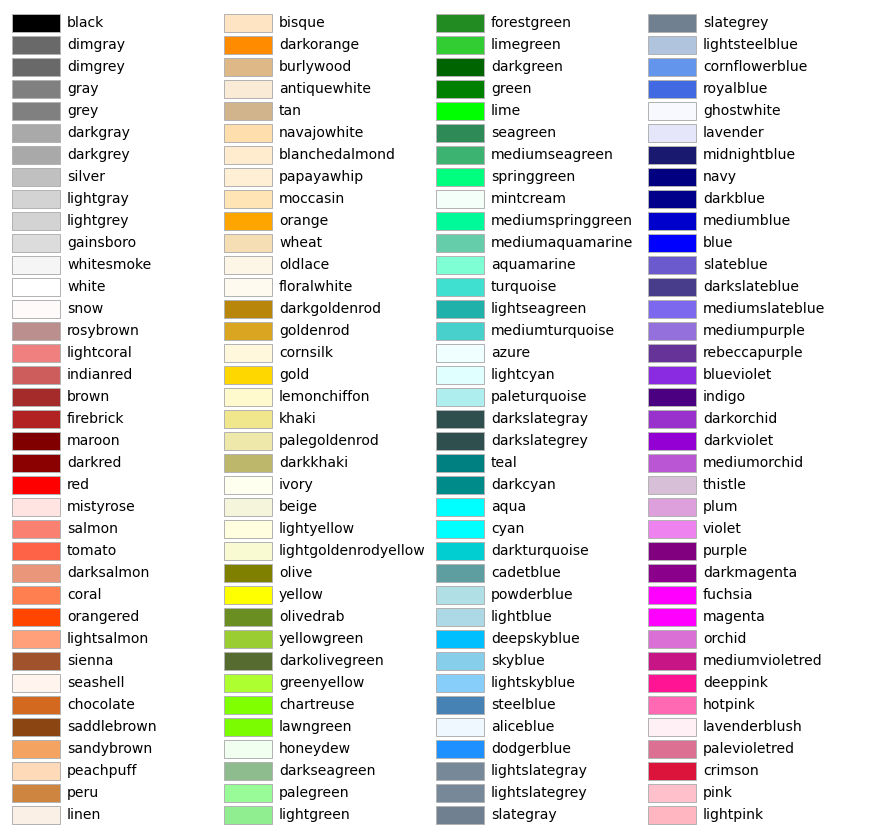


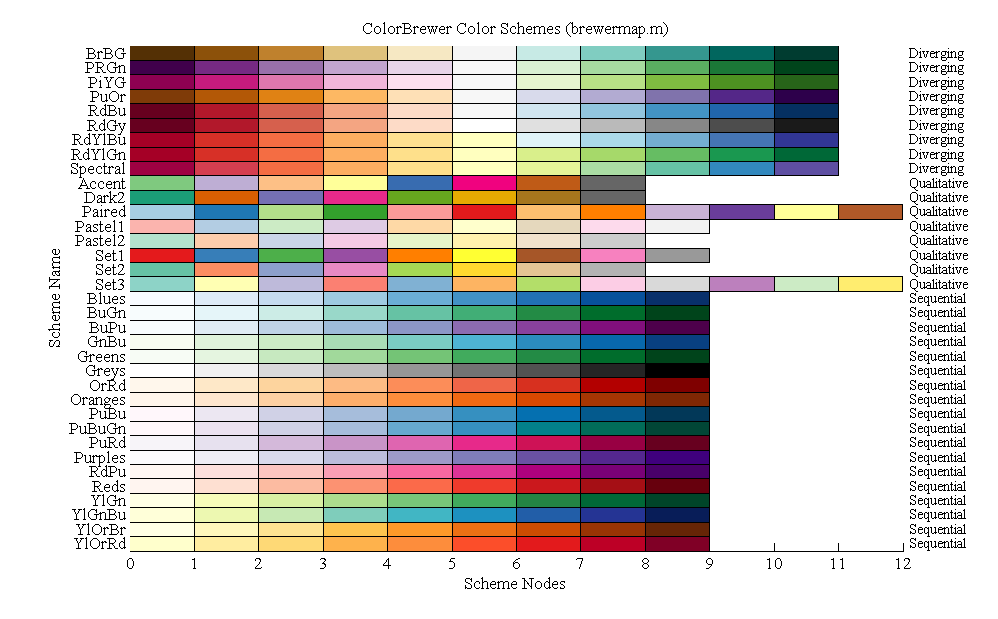

1. Faturamento por loja

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipython-input-4216315962.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig = sns.barplot(df_loja, palette='viridis')


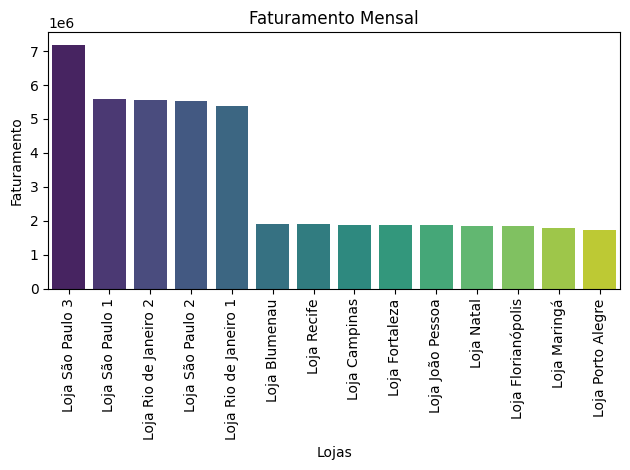

In [54]:
fig = sns.barplot(df_loja, palette='viridis')
plt.title('Faturamento Mensal')
plt.xlabel('Lojas')
plt.ylabel('Faturamento')
plt.xticks(rotation=90);
plt.tight_layout();

2. Faturamento Total por gerente


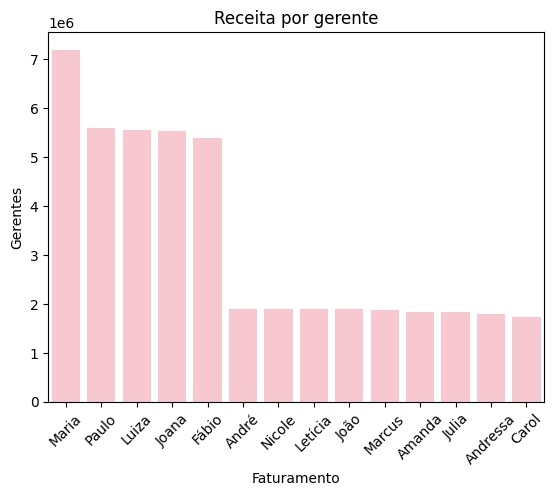

In [52]:
fig =  sns.barplot(df_gerentes_receita, color='pink')
plt.title('Receita por gerente')
plt.xlabel('Faturamento')
plt.ylabel('Gerentes')
plt.xticks(rotation=45);

3. Top 5 gerentes por receita

/tmp/ipython-input-878894222.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig =  sns.barplot(df_gerentes_receita.head(), palette='muted')


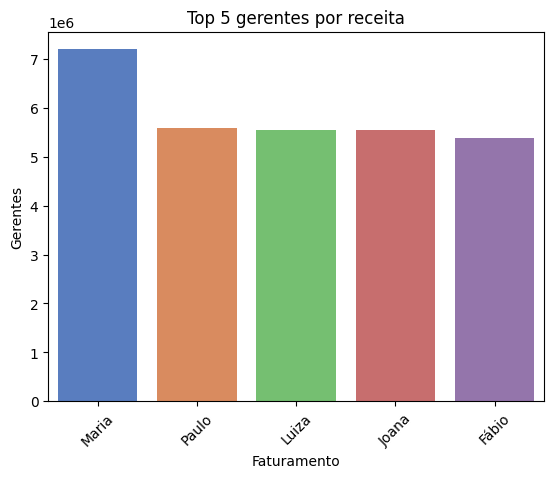

In [51]:
fig =  sns.barplot(df_gerentes_receita.head(), palette='muted')
plt.title('Top 5 gerentes por receita')
plt.xlabel('Faturamento')
plt.ylabel('Gerentes')
plt.xticks(rotation=45);

4. 5 ultimos

/tmp/ipython-input-3204327881.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fig =  sns.barplot(df_gerentes_receita.tail(), palette='RdBu')


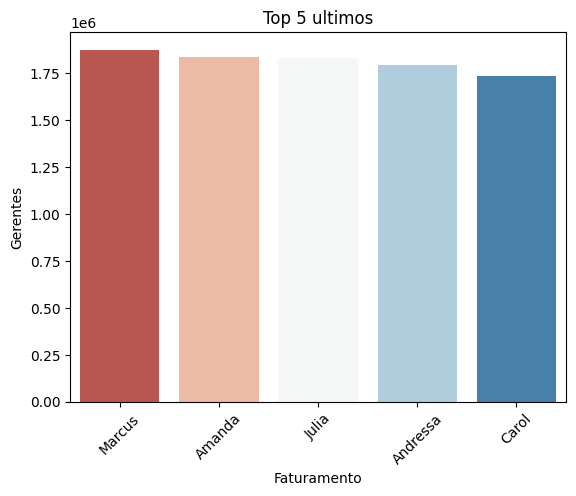

In [50]:
fig =  sns.barplot(df_gerentes_receita.tail(), palette='RdBu')
plt.title('Top 5 ultimos')
plt.xlabel('Faturamento')
plt.ylabel('Gerentes')
plt.xticks(rotation=45);

<Figure size 1000x600 with 0 Axes>

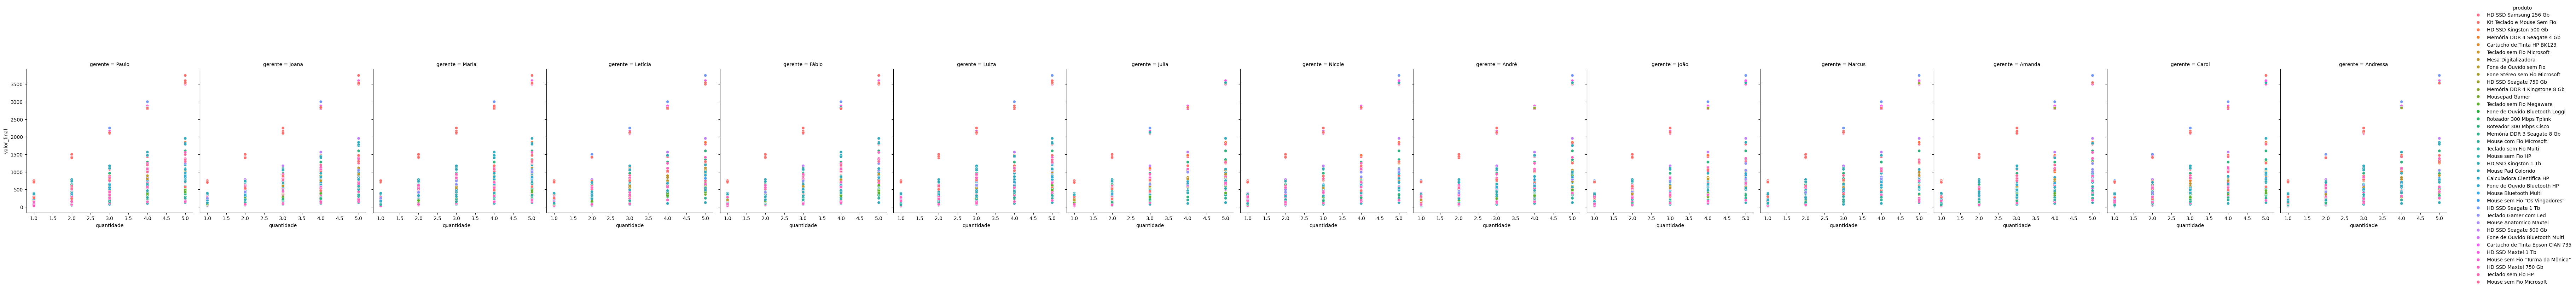

In [49]:
plt.figure(figsize=(10,6))
fig = sns.relplot(df_completo, x='quantidade', y='valor_final',hue='produto',
                  col='gerente');

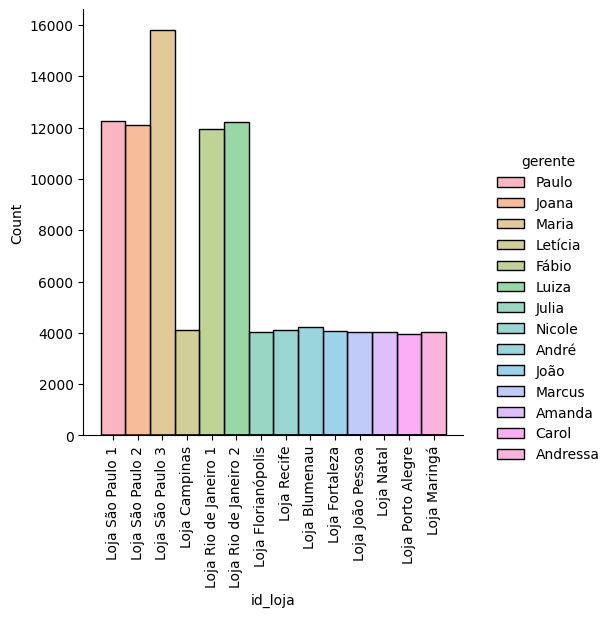

In [48]:
fig = sns.displot(df_completo, x='id_loja', hue='gerente')

plt.xticks(rotation=90);


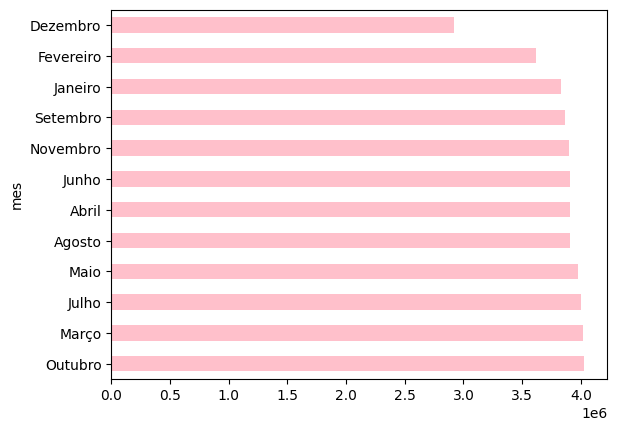

In [55]:
fig = df_faturamento_mes.plot(kind='barh', color='pink')